In [48]:
import numpy as np
np.random.seed(420)

import sklearn
from scipy import interp
from itertools import cycle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

preProcFeatsnew = np.load('./processed.files/labelled/featuresnew.npy')
preProcFeatsnewred = np.load('./redfeatnew.npy')
preProcLabelsnew = np.load('./processed.files/labelled/labelsnew.npy')

#preProcFeats = np.load('./processed.files/labelled/featuresold.npy')
preProcFeats = np.load('./redfeatold.npy')
preProcLabels = np.load('./processed.files/labelled/labelsold.npy')

print preProcFeats.shape
print preProcFeatsnew.shape

(12398, 163)
(12398, 481)


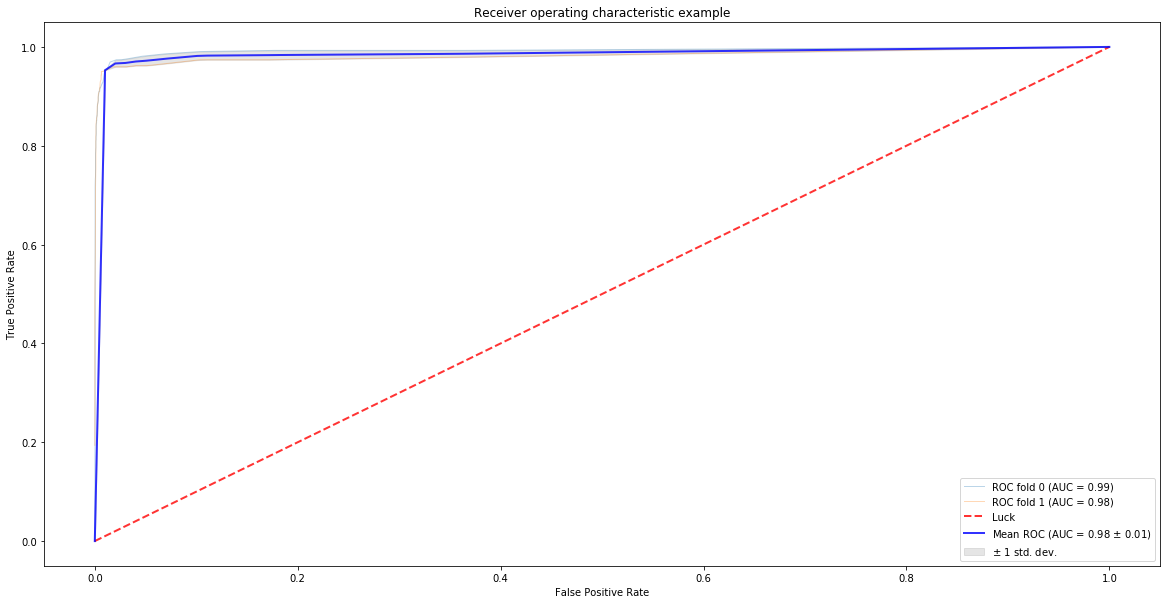

In [50]:
# Run classifier with cross-validation and plot ROC curves
k_fold = sklearn.model_selection.StratifiedKFold(n_splits=2, shuffle=True)

clf = sklearn.multiclass.OneVsRestClassifier(estimator=sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False),
            n_jobs=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

X = preProcFeatsnew
y = preProcLabelsnew

y[y != 9] = 0
y[y == 9] = 1

plt.figure(figsize=(20, 10))

i = 0
for train, test in k_fold.split(X, y):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    
    #Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('graphs/TOC.png')
plt.show()

In [1]:
import numpy as np
np.random.seed(420)

import sklearn
from scipy import interp
from itertools import cycle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

preProcFeatsnew = np.load('./processed.files/labelled/featuresnew.npy')
preProcFeatsnewred = np.load('./redfeatnew.npy')
preProcLabelsnew = np.load('./processed.files/labelled/labelsnew.npy')

#preProcFeats = np.load('./processed.files/labelled/featuresold.npy')
preProcFeats = np.load('./redfeatold.npy')
preProcLabels = np.load('./processed.files/labelled/labelsold.npy')

print preProcFeats.shape
print preProcFeatsnew.shape

(12398, 163)
(12398, 481)


In [2]:
k_fold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True)

clf = sklearn.multiclass.OneVsRestClassifier(estimator=sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False),
            n_jobs=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

X = preProcFeatsnew
y = preProcLabelsnew

y[y != 9] = 0
y[y == 9] = 1

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=420)

# Learn to predict each class against the other
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

print y_score.shape, y_test.shape

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label = 1)
print _
roc_auc = auc(fpr, tpr)

(3100, 2) (3100,)
[ 1.      0.9875  0.975   0.9625  0.95    0.9375  0.9125  0.9     0.875
  0.85    0.825   0.8125  0.8     0.7875  0.775   0.7625  0.75    0.7375
  0.7     0.6875  0.675   0.6625  0.6375  0.6125  0.575   0.5125  0.4375
  0.4     0.3625  0.35    0.3375  0.275   0.2625  0.25    0.2375  0.225
  0.2     0.1875  0.1625  0.15    0.1375  0.125   0.1125  0.1     0.0875
  0.075   0.0625  0.05    0.0375  0.025   0.0125  0.    ]


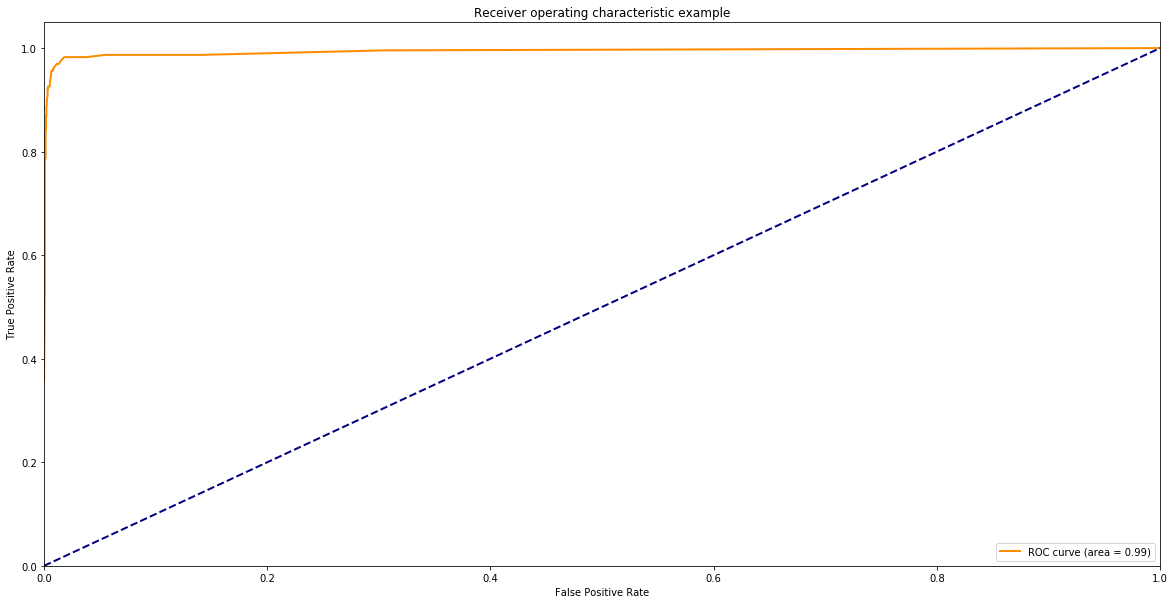

In [3]:
plt.figure()
plt.figure(figsize=(20, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)'%(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()